In [ ]:
#importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# loading the Dataset

In [3]:
df=pd.read_csv(r'C:\Users\Welcome\Downloads\titanic_train.csv')

In [4]:
# Going through the Dataset

In [5]:
df[:6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
# Cleaning and Preprocessing

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Filling the Age Column using the median Ages for different passenger Classes (using boxplot for Central Tendency)

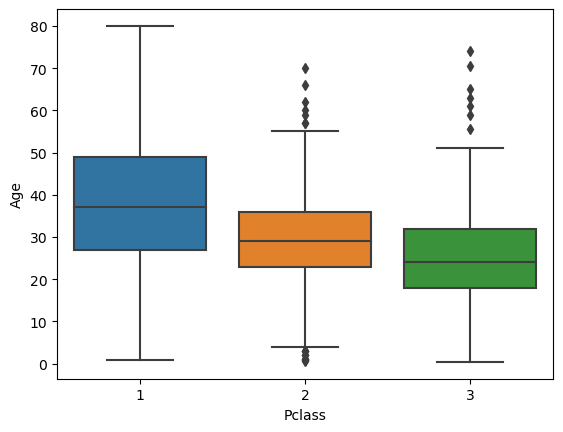

In [8]:
sns.boxplot(x="Pclass",y="Age",data=df)
plt.show()

In [9]:
def Age_fill(col):
    Age=col[0]
    Pclass=col[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 23
    else:
        return Age
        

In [13]:
df["Age"]=df[["Age","Pclass"]].apply(Age_fill,axis=1)

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# We need to drop the Cabin Column as there are many null values in it ( With the help of Feature Engineering we can fill the Null Values)

In [16]:
df=df.drop(["Cabin"],axis=1)

In [17]:
# Exploratory Data Analysis

In [18]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


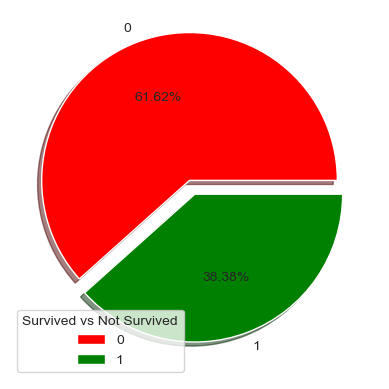

In [68]:
f1=plt.pie(list(df["Survived"].value_counts()),labels=list(df["Survived"].value_counts().keys()),explode=[0.1,0],autopct="%.2f%%",shadow=True,colors=["r","g"])
plt.legend(title="Survived vs Not Survived")
plt.show()

In [40]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
#so we can clearly see that the number of people who died are more compare to the ones who survived

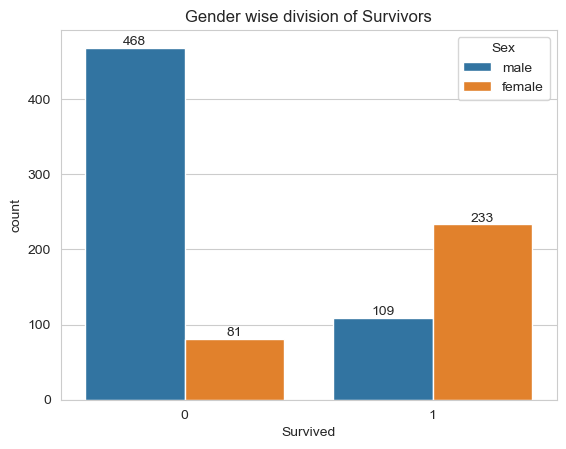

In [80]:
f1=sns.countplot(x="Survived",data=df,hue="Sex")
plt.title("Gender wise division of Survivors")
sns.set_style('whitegrid')
for bar in f1.containers:
    f1.bar_label(bar)
plt.show()

In [22]:
# we can see that Death rate was high among the Male passengers and survival rate was high among the Female Passengers.

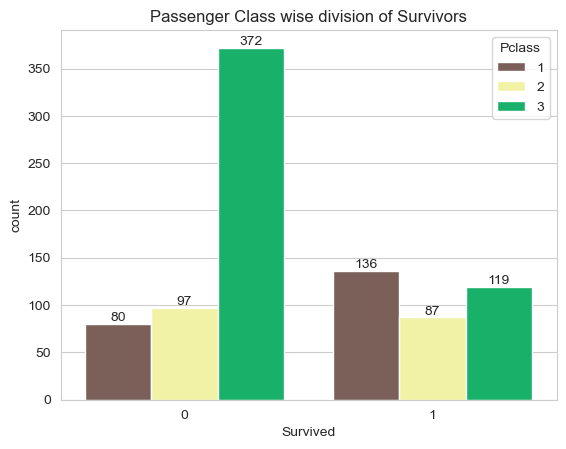

In [81]:
f1=sns.countplot(x="Survived",data=df,palette='terrain_r',hue="Pclass")
plt.title("Passenger Class wise division of Survivors")
sns.set_style('whitegrid')
for bar in f1.containers:
    f1.bar_label(bar)
plt.show()

In [24]:
# We can see that  most people who died were from 3rd passsenger Class and Survival was most from the 1st Class Passenger

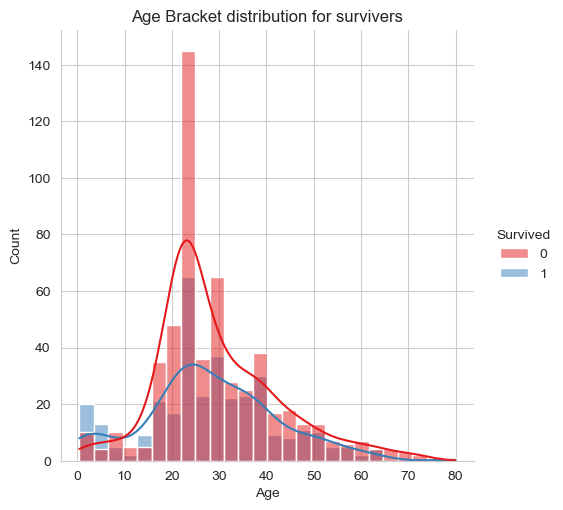

In [82]:
sns.displot(x="Age",data=df,kde=True,hue="Survived",palette="Set1")
plt.title("Age Bracket distribution for survivers")
plt.show()

In [26]:
# With the help of Histogram we can see that most people who either survived or not were from the age group of 20-30

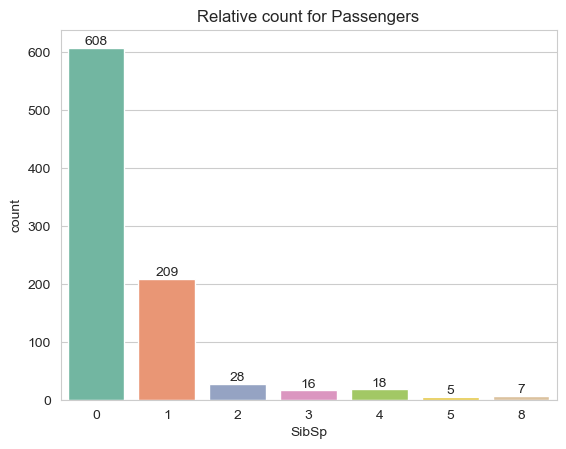

In [83]:
f1=sns.countplot(x="SibSp",data=df,palette='Set2')
plt.title("Relative count for Passengers")
sns.set_style('whitegrid')
for bar in f1.containers:
    f1.bar_label(bar)
plt.show()

In [28]:
# Most People didn't have any siblings or relative with them onboard

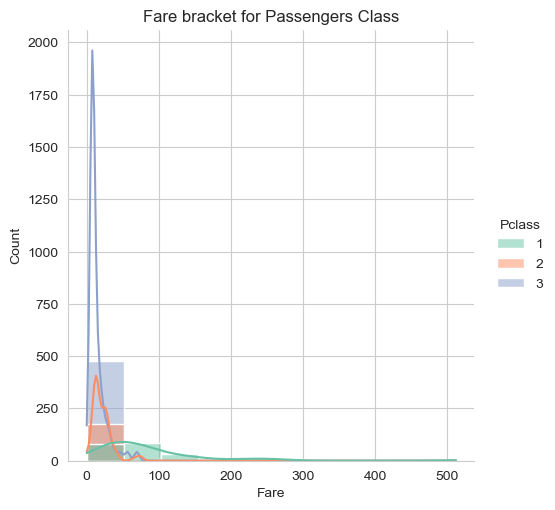

In [84]:
sns.displot(x="Fare",data=df,kde=True,bins=10,hue="Pclass",palette="Set2")
plt.title("Fare bracket for Passengers Class")
plt.show()

In [70]:
# we can see that fare was almot between 0-100 for all the passengers
# Although we can see that for Passengers from class 1 the central value is slightly more and for 1 and 2 it is less

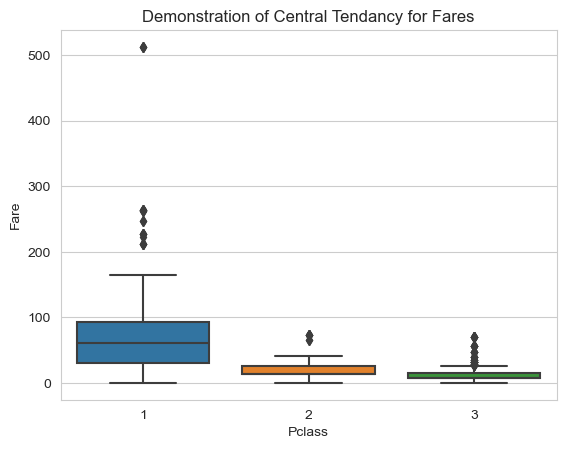

In [85]:
sns.boxplot(x="Pclass",y="Fare",data=df)
plt.title("Demonstration of Central Tendancy for Fares")
plt.show()

In [73]:
#This clearly shows that average Fare was much higher for the 1st class people.